In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
def print_characters(X, y, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(y[index], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

# MNIST

http://yann.lecun.com/exdb/mnist/

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='liac-arff')

In [4]:
X = X.to_numpy()
y = y.to_numpy()

All images are 28x28 pixel arrays, each (grayscale) pixel represented by a value between 0 and 255

In [5]:
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

Images are already centered

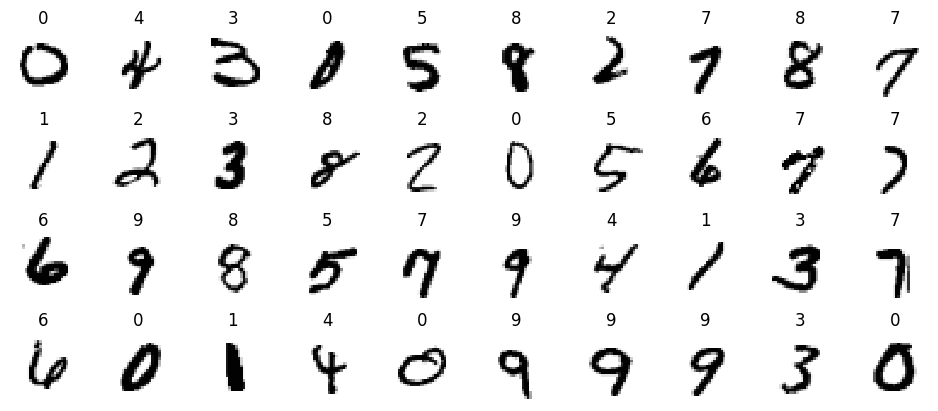

In [7]:
indexes = np.random.randint(0, X.shape[0], 4*10)
print_characters(X[indexes], y[indexes])

In [8]:
counts = np.unique(y, return_counts=True)
counts = dict(zip(*counts))

In [9]:
counts

{'0': 6903,
 '1': 7877,
 '2': 6990,
 '3': 7141,
 '4': 6824,
 '5': 6313,
 '6': 6876,
 '7': 7293,
 '8': 6825,
 '9': 6958}

Text(0.5, 1.0, 'Number of images per class')

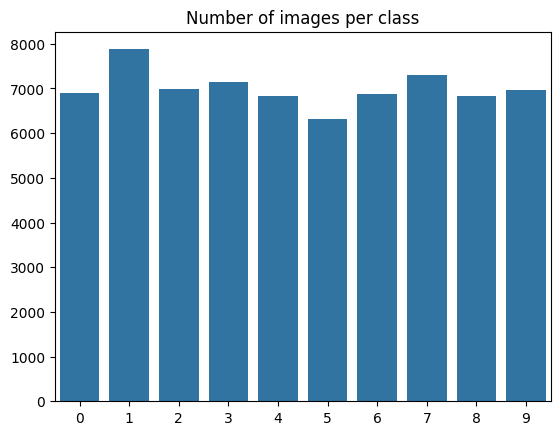

In [10]:
sns.barplot(counts, orient='v').set_title("Number of images per class")

# EMNIST - Digits

https://www.nist.gov/itl/products-and-services/emnist-dataset

The emnist-mnist* files from the dataset archive have to be uncompressed and unpacked into the emnist_mnist directory.

In [11]:
from load_emnist_mnist import load_emnist_mnist

X_train, X_test, y_train, y_test = load_emnist_mnist("emnist_mnist")

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
y_test.shape

(10000,)

### Train set

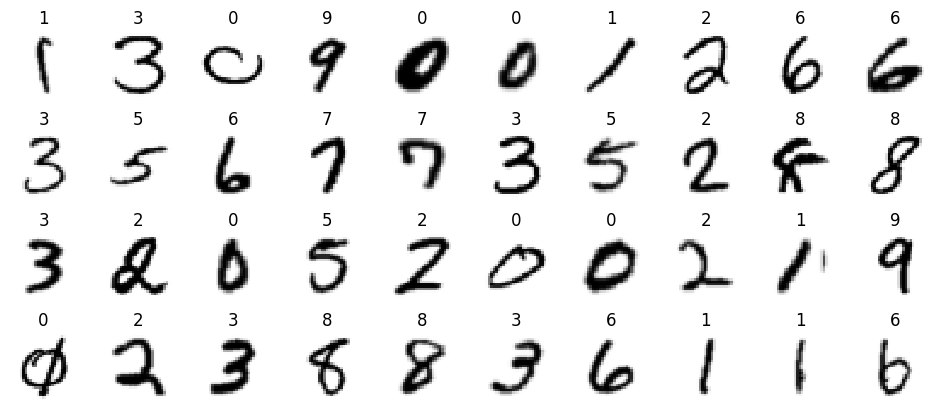

In [16]:
indexes = np.random.randint(0, X_train.shape[0], 4*10)
print_characters(X_train[indexes], y_train[indexes])

### Test set

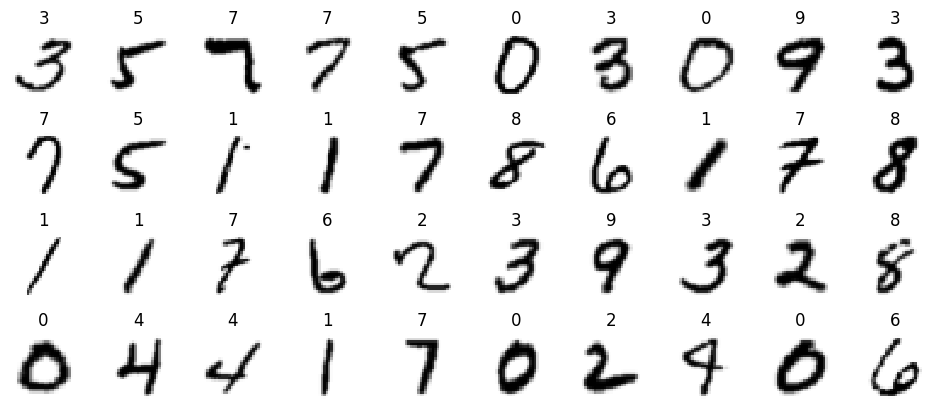

In [17]:
indexes = np.random.randint(0, X_test.shape[0], 4*10)
print_characters(X_test[indexes], y_test[indexes])

In [18]:
train_counts = np.unique(y_train, return_counts=True)
train_counts = dict(zip(*train_counts))
test_counts = np.unique(y_test, return_counts=True)
test_counts = dict(zip(*test_counts))

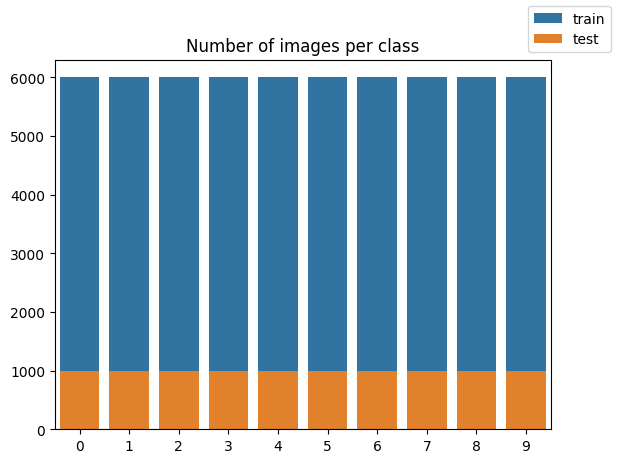

In [19]:
fig = plt.figure()
sns.barplot(train_counts, orient='v', label="train")
sns.barplot(test_counts, orient='v', label="test").set_title("Number of images per class")
fig.legend()

In [20]:
train_counts

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

In [21]:
test_counts

{0: 1000,
 1: 1000,
 2: 1000,
 3: 1000,
 4: 1000,
 5: 1000,
 6: 1000,
 7: 1000,
 8: 1000,
 9: 1000}

EMNIST MNIST and MNIST datasets do not seem to have common (exactly the same) images.

In [22]:
import hashlib
XE = np.concatenate((X_train.reshape(-1, 28*28), X_test.reshape(-1, 28*28)))
emnist_hashes = [hashlib.sha256(bytes(n)).hexdigest() for n in XE]
mnist_hashes = [hashlib.sha256(bytes(n)).hexdigest() for n in X]

In [23]:
a = set(mnist_hashes)
b = set(emnist_hashes)

In [24]:
a.intersection(b)

set()

# EMNIST - Letters

https://www.nist.gov/itl/products-and-services/emnist-dataset

The emnist-letters* files from the dataset archive have to be uncompressed and unpacked into the emnist_letters directory.

In [1]:
from load_emnist_mnist import load_emnist_letters

X_train, X_test, y_train, y_test = load_emnist_letters("emnist_letters")

In [2]:
X_train.shape

(124800, 28, 28)

In [3]:
y_train.shape

(124800,)

In [4]:
X_test.shape

(20800, 28, 28)

y_test.shape

### Train set

Each image is labeled with index of the letter in the English alphabet.

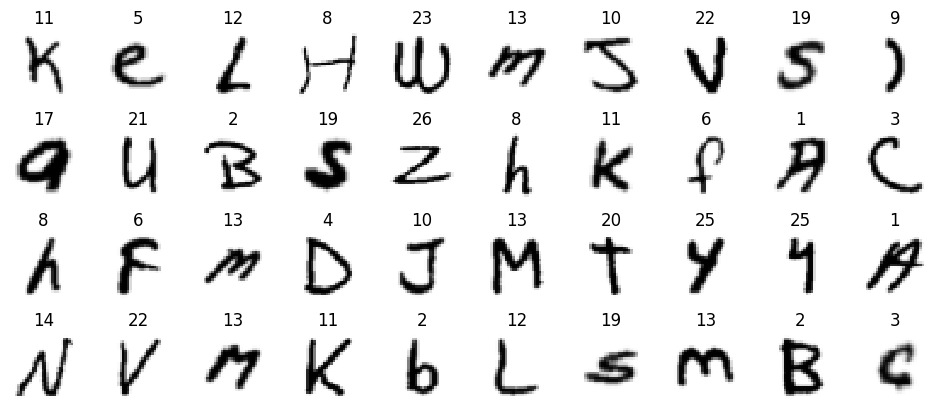

In [9]:
indexes = np.random.randint(0, X_train.shape[0], 4*10)
print_characters(X_train[indexes], y_train[indexes])

### Test set

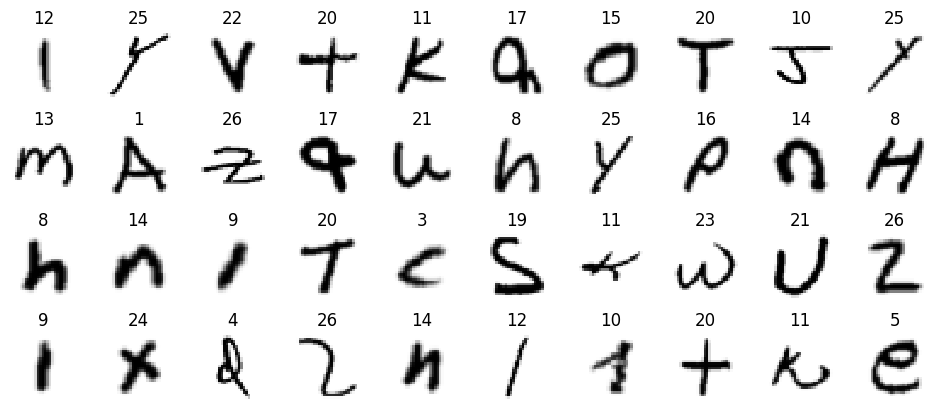

In [11]:
indexes = np.random.randint(0, X_test.shape[0], 4*10)
print_characters(X_test[indexes], y_test[indexes])

In [12]:
train_counts = np.unique(y_train, return_counts=True)
train_counts = dict(zip(*train_counts))
test_counts = np.unique(y_test, return_counts=True)
test_counts = dict(zip(*test_counts))

In [14]:
train_counts

{1: 4800,
 2: 4800,
 3: 4800,
 4: 4800,
 5: 4800,
 6: 4800,
 7: 4800,
 8: 4800,
 9: 4800,
 10: 4800,
 11: 4800,
 12: 4800,
 13: 4800,
 14: 4800,
 15: 4800,
 16: 4800,
 17: 4800,
 18: 4800,
 19: 4800,
 20: 4800,
 21: 4800,
 22: 4800,
 23: 4800,
 24: 4800,
 25: 4800,
 26: 4800}

In [15]:
test_counts

{1: 800,
 2: 800,
 3: 800,
 4: 800,
 5: 800,
 6: 800,
 7: 800,
 8: 800,
 9: 800,
 10: 800,
 11: 800,
 12: 800,
 13: 800,
 14: 800,
 15: 800,
 16: 800,
 17: 800,
 18: 800,
 19: 800,
 20: 800,
 21: 800,
 22: 800,
 23: 800,
 24: 800,
 25: 800,
 26: 800}